# Proyecto

**Objetivo:** Analizar y optimizar datos de marketing, identificar donde vale la penar invertir

# Importaremos las librerías de python, y los Datasets del proyecto

In [1]:
#importammos las librerías a usar en este proyecto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# cargaremos los Datasets correspondientes
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs =  pd.read_csv('/datasets/costs_us.csv')

## Exploración inical de los datos

In [3]:
#Paso a llamar los métodos .info() para ver el número de valores y el tipo de dato de cada columna, además usamos el el método .head
#Para tener una mejor idea de como se ven nuestras tablas.
visits.info()
orders.info()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 

In [4]:
#Revisamos algunas tuplas de nuestro conjunto de datos
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [5]:
#Revisamos algunas tuplas de nuestro conjunto de datos
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [6]:
#Revisamos algunas tuplas de nuestro conjunto de datosv
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


## Conversión de datos y resultado de la primera exploración

Nos dimos cuenta que hay algunas columnas en las que debemos cambiar el tipo de dato, así también como normalizar el nombre de las columnas.

In [7]:
#Vamos a usar el método .rename() para cambiar el nombre de las columnas, y así cumplir con el formato snake_case.
visits = visits.rename(columns={'Device':'device', 'End Ts':'end_ts', 'Source Id':'source_id', 'Start Ts': 'start_ts', 'Uid':'uid'})

#Cambiaremos el nombre de las siguientes columnas en el conjunto de datos orders
orders = orders.rename(columns={'Buy Ts':'buy_ts', 'Revenue':'revenue', 'Uid':'uid'})

In [8]:
#Pasaremos a hacer la conversión de datos en algunas columnas que lo ameritan
visits['start_ts'] = pd.to_datetime(visits['start_ts'])

visits['end_ts'] = pd.to_datetime(visits['end_ts'])

orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

costs['dt'] = pd.to_datetime(costs['dt'])

In [9]:
#Verificamos que los cambios se hayan aplicado efectivamente en los conjuntos de datos
visits.info()
orders.info()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2

In [10]:
#Revisamos que los cambios se hayan aplicado 
visits.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [11]:
#Revisamos que los cambios se hayan aplicado
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [12]:
#Revisamos que los cambios se hayan aplicado
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


En este paso exploramos los conjuntos de datos **visits, orders y costs**, identificamos que el tipo de dato de las columnas que representan tiempo debía ser cambiado a datetime, para garantizar calculos temporales y agregaciones correctas.
Estos son los cambias que le aplicamos a nuestros conjuntos de datos:

### Cambios en nombres de columnas

Dataset **visits**:

- La columna **Device** fue renombrada a **device**.

- La columna **End Ts** fue renombrada a **end_ts**.

- La column **Source Id** fue renombrada a **source_id**.

- La columna **Start Ts** fue renombrada a **start_ts**.

- La columna **Uid** fue renombrada a **uid**.

Dataset **orders**:

- La columna **Buy Ts** fue renombrada a **buy_ts**.

- La columna **Revenue** fue renombrada a **revenue**.

- La columna **Uid**fue renombrada a **uid**.

Cambios en tipos de datos

- El tipo de dato de la columna **start_ts** del dataset **visits** fue convertido a datetime.

- El tipo de dato de la columna **end_ts** del dataset visits** fue convertido a datetime.

- El tipo de dato de la columna **buy_ts** del dataset **orders** fue convertido a datetime.

- El tipo de dato de la columna **dt** del dataset **costs** fue convertido a datetime.

Crearemos algunas columnas auxiliares, es de suma importancia tenerlas preparadas porque serán de utilidad al momento de realizar reportes y calcular métricas.

In [13]:
#Columnas auxiliares

#columna que guardará la duración de cada sesión en segundos, se calcula sacando la diferencia entre las tuplas de 'end_ts' con las de 'start_ts'
visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

visits['visit_year'] = visits['start_ts'].dt.isocalendar().year

#El mes de esa visita
visits['visit_month'] = visits['start_ts'].dt.month

#Guardamos la semana en que hizo la visita
visits['visit_week'] = visits['start_ts'].dt.isocalendar().week

#Guardamos la fecha de la sesión
visits['visit_date'] = visits['start_ts'].dt.date

#Haremos un slice de datos con el mes en que se hicieron las compras, esto será importante después.
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

#Creamos una columna para guardar solamente el mes en que se realizó un gasto.
costs['month'] = costs['dt'].astype('datetime64[M]')

#margin_rate
margin_rate = 0.4

# Crear columna month (año-mes) en cada dataset

visits['month'] = visits['start_ts'].dt.to_period('M')
orders['month'] = orders['buy_ts'].dt.to_period('M')
costs['month'] = costs['dt'].dt.to_period('M')

# Métricas y reporte

## DataFrame de visitas 

### ¿Cuántas personas usan nuestro servicio cada día, cada semana y cada mes?

In [14]:
#Daily active users
dau = visits.groupby('visit_date')['uid'].nunique()

#Weekly active users
wau = visits.groupby('visit_week')['uid'].nunique()

#Monthly active users
mau = visits.groupby('visit_month')['uid'].nunique()

In [15]:
dau_total = visits.groupby('visit_date').agg({'uid':'nunique'}).mean()

wau_total = visits.groupby(['visit_year','visit_week']).agg({'uid':'nunique'}).mean()

mau_total = visits.groupby(['visit_year','visit_month']).agg({'uid':'nunique'}).mean()

print('Promedio de visitas diarias: ', int(dau_total))
print('Promedio de visitas semanales: ',int(wau_total))
print('Promedio de visitas mensuales: ', int(mau_total))

Promedio de visitas diarias:  907
Promedio de visitas semanales:  5716
Promedio de visitas mensuales:  23228


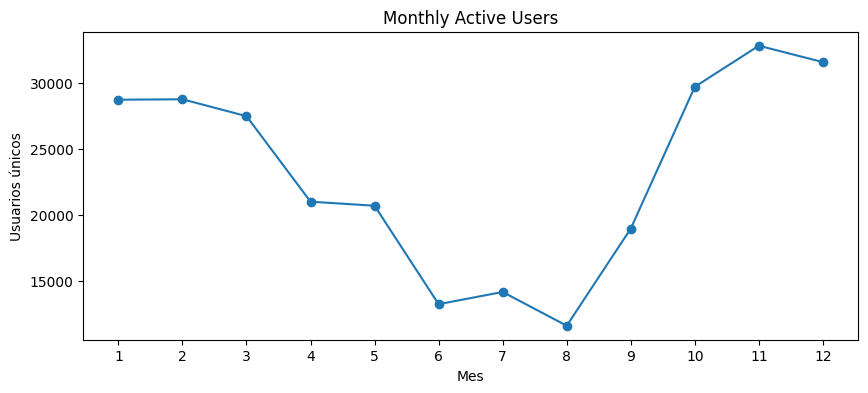

In [16]:
#Gráfico de usuarios activos por mes
mau.plot(figsize=(10,4), title='Monthly Active Users', marker='o')
plt.xticks(range(1,13))
plt.ylabel('Usuarios únicos')
plt.xlabel('Mes')
plt.show()

### Observaciones

Sacamos el promedio de visitas diarias, semanales y mensuales, con esto nos podemos dar una idea del volumen de3 las visitas, al parecer vemos valores constantes.

Nuestro gráfico de usuarios activos por mes nos indica que tuvimos un buen inicio de año, pero este fue decayendo hasta alcanzar un la cantidad más baja de usuarios activos mensuales al 8vo mes, luego de eso tuvimos una recuperación fuerte y sólida, alcanzando un pico máximo en el mes 11.

## ¿Cuántas sesiones hay por día?

In [17]:
#Agrupamos los registros por fecha de visita
sessions_per_day = (
    visits
    .groupby('visit_date')
    .agg(
        #contamos el número de sesiones por día
        n_sessions=('uid', 'count'),
        #Contamos el número de usuarios únicos por día
        n_users=('uid', 'nunique')
    )
)
#Calculamos el promedio de sesiones por usuario para cada día
sessions_per_day['sessions_per_user'] = (
    sessions_per_day['n_sessions'] / sessions_per_day['n_users']
)

#Vemos una pequeña muestra de nuestros datos
sessions_per_day.head()

,n_sessions,n_users,sessions_per_user
visit_date,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024


In [18]:
#Sacamos el promedio de sesions al día 
print('Promedio de sesiones al día: ',sessions_per_day['n_sessions'].mean())

Promedio de sesiones al día:  987.3626373626373


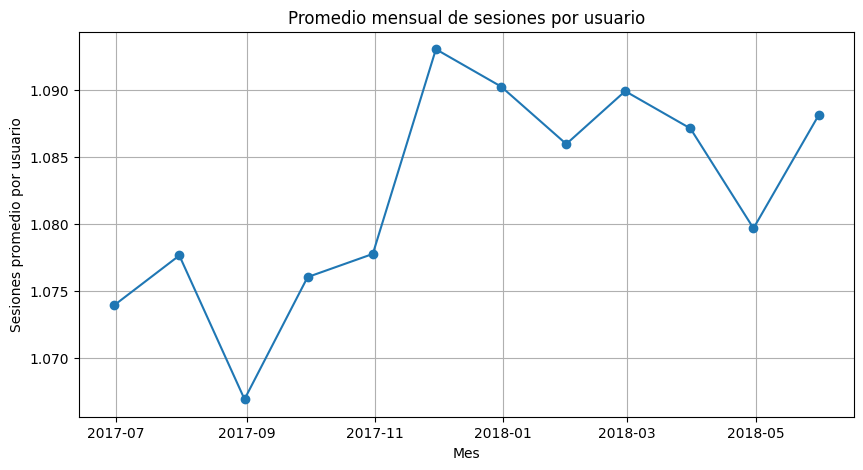

In [19]:
# Convertimos el índice a formato datetime para poder trabajar con series temporales
sessions_per_day.index = pd.to_datetime(sessions_per_day.index)

# Calculamos el promedio mensual de sesiones por usuario
sessions_per_month = (
    sessions_per_day
    .resample('M')
    .mean()
)

# Creamos un gráfico de línea para visualizar la tendencia mensual
plt.figure(figsize=(10,5))

# Graficamos el promedio mensual de sesiones por usuario
plt.plot(
    sessions_per_month.index,
    sessions_per_month['sessions_per_user'],
    marker='o'
)

# Agregamos títulos y etiquetas para facilitar la interpretación
plt.title('Promedio mensual de sesiones por usuario')
plt.xlabel('Mes')
plt.ylabel('Sesiones promedio por usuario')
plt.grid(True)

plt.show()

### ¿Cuál es la duración de cada sesión?

In [20]:
#Creamos una columan con la duración de las sesiones en segundos
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

Text(0, 0.5, 'Número de sesiones')

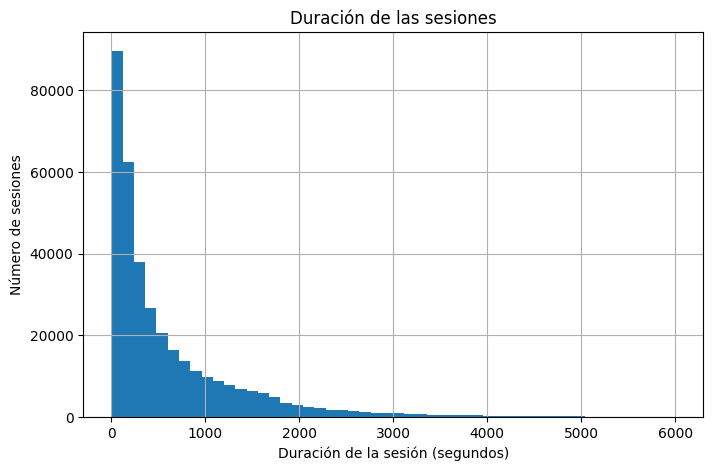

In [21]:
#Creamos un histograma para ver la distribución 
plt.figure(figsize=(8,5))
visits['session_duration_sec'].hist(bins=50, range=(0,5999))
plt.title('Duración de las sesiones')
plt.xlabel('Duración de la sesión (segundos)')
plt.ylabel('Número de sesiones')

In [22]:
# Calculamos la duración promedio de una sesión en segundos
print('Duración de una sesión promedio (segundos):', visits['session_duration_sec'].mean())

# Calculamos la moda de la duración de las sesiones para identificar el valor más frecuente
print('Moda de duración de sesiones (segundos):', visits['session_duration_sec'].mode()[0])

Duración de una sesión promedio (segundos): 643.506488592098
Moda de duración de sesiones (segundos): 60


### ¿Con qué frecuencia los usuarios regresan?

In [23]:
# Agrupa los datos por usuario (uid) y cuenta el número de días distintos
# en los que cada usuario ha realizado al menos una visita 
user_activity_days = (
    visits
    .groupby('uid')['visit_date']
    .nunique()
)

# Calcula el número total de usuarios únicos
total_users = user_activity_days.count()

# Identifica y cuenta los usuarios que han visitado el servicio
# en más de un día (usuarios recurrentes)
returning_users = (user_activity_days > 1).sum()

# Calcula la tasa de retorno como porcentaje de usuarios recurrentes
return_rate = (returning_users / total_users) * 100

# Muestra el porcentaje de usuarios que utilizan el servicio nuevamente
print('El porcentaje de usuarios que usa nuestro servicio nuevamente es: ', return_rate, '%')

El porcentaje de usuarios que usa nuestro servicio nuevamente es:  19.741945663083065 %


### Observaciones

- Vemos que el promedio de visitas diarias es de 987 sesiones aproximadamente, la plataforma mantiene un tráfico constante a lo largo de los meses y semanas.
- El número de usuarios activos por mes empiza alto y fuerte, pero baja hasta alcanzar su punto más bajo durante el 8vo mes. Después de experimentar esta bajada, nuestro número de usuarios activos va en alza hasta alcanzar un pico máximo en el 11vo mes.
- El tiempo que dura una sesión promedio es de casi 11 minutos.
- La moda de la duración de sesiones es de 60 segundos, esto nos indica que la mayoría de los usuarios participan en sesiones cortas.
- Aproximadamente el 19.74% de nuestros usuarios usa nuestro servicio nuevamente. 

## DataFrame de Ventas

### ¿Cuándo empieza la gente a comprar?

In [24]:
# Calcula la primera visita registrada de cada usuario
first_visit = visits.groupby('uid')['start_ts'].min().reset_index()

# Calcula la fecha de la primera compra de cada usuario
first_order = orders.groupby('uid')['buy_ts'].min().reset_index()

# Obtiene el mes en el que cada usuario realizó su primera compra
first_order_month = orders.groupby('uid')['order_month'].min().reset_index()

# Renombra la columna para mayor claridad
first_order_month = first_order_month.rename(columns={'order_month': 'first_order_month'})

# Une la primera visita con la primera compra por usuario
conversion_data = pd.merge(first_visit, first_order, on='uid', how='inner').dropna()

# Añade el mes de la primera compra al conjunto de datos
conversion_data = pd.merge(conversion_data, first_order_month, on='uid', how='inner').dropna()

# Renombra columnas para facilitar la interpretación
conversion_data = conversion_data.rename(columns={
    'start_ts': 'first_visit',
    'buy_ts': 'first_order'
})

# Muestra el número total de usuarios que realizaron al menos una compra
print('Usuarios que compraron:', len(conversion_data))

# Visualiza las primeras filas del conjunto final
conversion_data.head()


Usuarios que compraron: 36523


,uid,first_visit,first_order,first_order_month
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,2017-06-01
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,2017-10-01
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,2017-11-01


In [25]:
# Calcula los días transcurridos entre la primera visita y la primera compra de cada usuario
conversion_data['conversion_days'] = (
    conversion_data['first_order'] - conversion_data['first_visit']
).dt.days

# Muestra la distribución de usuarios según el tiempo de conversión
conversion_data['conversion_days'].value_counts().sort_index()

0      26363
1       1011
2        563
3        434
4        324
       ...  
354        1
355        3
357        4
362        1
363        1
Name: conversion_days, Length: 345, dtype: int64

Para responer a la pregunta, de cuando los usuarios empiezan a comprar, creamos una columna **['conversion_days']** esta contiene la diferencia en días del tiempo transcurrido entre el día que se hizo la primera orden y el día de la primera visita. 

In [26]:
# Calculamos el promedio de días que tarda un usuario en realizar su primera compra
avg_conversion_days = conversion_data['conversion_days'].mean()

# Calculamos la moda del tiempo de conversión para identificar el número de días más frecuente
conversion_days_mode = conversion_data['conversion_days'].mode()

# Mostramos estadísticas descriptivas del tiempo de conversión
conversion_data['conversion_days'].describe()

count    36523.000000
mean        16.729869
std         46.959088
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: conversion_days, dtype: float64

In [27]:
# Mostramos el valor más común del tiempo de conversión en días
print("La moda en 'conversion_days' (en días): ", conversion_days_mode[0])

La moda en 'conversion_days' (en días):  0


### Observaciones

Al revisar los datos estadísticos de nuestra columna 'conversion_days' podemos notas que en promedio, nuestros usuarios y usuarias tardan al rededor de 16 días en hacer su primera compra, aunque este valor puede no representar con claridad cuanto tarda la mayor parte de los usuarios en hacer su primer compra después de visitar el sitio por primera vez, confirmamos esta hipótesis con la desviación estándar, el valor que vemos es 46.95, un valor alto, esto podría significar que los datos no son cercanos entre sí, o hay valores atípicos.

La mayor parte de nuestros usuarios toman menos de un día para hacer su primera compra, después de su primera visita.

In [28]:
# ===============================
# CÁLCULO DE LTV POR COHORTES
# ===============================

# Calcula el tamaño de cada cohorte según el mes de la primera compra
# (número de compradores únicos por cohorte)
cohort_sizes = (
    conversion_data
    .groupby('first_order_month')['uid']
    .nunique()
    .reset_index()
)

# Renombra columnas para mayor claridad
cohort_sizes.columns = ['first_order_month', 'n_buyers']


# Une cada pedido con el mes de la primera compra del usuario
# Esto permite analizar los ingresos por cohorte
orders_cohort = orders.merge(first_order_month, on='uid')


# Calcula el revenue total generado por cada cohorte en cada mes
cohorts_revenue = (
    orders_cohort
    .groupby(['first_order_month', 'order_month'], as_index=False)
    .agg({'revenue': 'sum'})
)


# Combina el tamaño de la cohorte con los ingresos generados
report = cohort_sizes.merge(
    cohorts_revenue,
    on='first_order_month',
    how='left'
)


# Calcula la ganancia bruta aplicando el margen definido
report['gross_profit'] = report['revenue'] * margin_rate


# Calcula la edad de la cohorte en meses desde la primera compra
report['age'] = (
    (report['order_month'] - report['first_order_month'])
    / np.timedelta64(1, 'M')
).round().astype(int)


# Calcula el LTV promedio por usuario para cada cohorte y edad
report['ltv'] = report['gross_profit'] / report['n_buyers']


# ===============================
# CÁLCULO DE CAC Y ROMI
# ===============================

# Calcula el gasto mensual total de marketing
monthly_costs = costs.groupby('dt', as_index=True)['costs'].sum()

#

monthly_revenue = (
    orders
    .merge(visits[['uid', 'source_id']], on='uid', how='left')
    .groupby(['source_id', 'month'])['revenue']
    .sum()
    .reset_index()
)

# Une los costos de marketing con el reporte de cohortes
report = report.merge(
    monthly_costs,
    left_on='first_order_month',
    right_index=True,
    how='left'
)


# Calcula el CAC (Costo de Adquisición de Cliente)
report['cac'] = report['costs'] / report['n_buyers']

# Calcula el ROMI (Return on Marketing Investment)
report['romi'] = report['ltv'] / report['cac']


# ===============================
# TABLA DE COHORTES (LTV)
# ===============================

# Crea una tabla de cohortes con LTV por mes de vida
cohort_ltv = report.pivot_table(
    index='first_order_month',
    columns='age',
    values='ltv',
    aggfunc='mean'
).round(2)


# Reemplaza valores faltantes para facilitar la visualización
cohort_ltv = cohort_ltv.fillna(0)


# Calcula el LTV acumulado promedio a 6 meses
m6_cum_ltv = cohort_ltv.cumsum(axis=1).mean(axis=0)[5]

# Muestra el reporte final
report.head(100)

,first_order_month,n_buyers,order_month,revenue,gross_profit,age,ltv,costs,cac,romi
0,2017-06-01,2023,2017-06-01,9557.49,3822.996,0,1.889766,735.26,0.363450,5.199516
1,2017-06-01,2023,2017-07-01,981.82,392.728,1,0.194131,735.26,0.363450,0.534135
2,2017-06-01,2023,2017-08-01,885.34,354.136,2,0.175055,735.26,0.363450,0.481647
3,2017-06-01,2023,2017-09-01,1931.30,772.520,3,0.381869,735.26,0.363450,1.050676
4,2017-06-01,2023,2017-10-01,2068.58,827.432,4,0.409012,735.26,0.363450,1.125360
...,...,...,...,...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,445.948,2,0.126224,1437.28,0.406816,0.310272
75,2018-04-01,2276,2018-04-01,10600.69,4240.276,0,1.863039,NaN,NaN,NaN
76,2018-04-01,2276,2018-05-01,1209.92,483.968,1,0.212640,NaN,NaN,NaN
77,2018-05-01,2988,2018-05-01,13925.76,5570.304,0,1.864225,597.06,0.199819,9.329555


En esta sección se calculó el LTV por cohortes para analizar cuánto valor generan los clientes a lo largo del tiempo.  
Posteriormente, se comparó este valor con el costo de adquisición (CAC) para evaluar la rentabilidad de las inversiones en marketing mediante el indicador ROMI.

### ¿Cuántos pedidos hacen durante un período de tiempo dado?

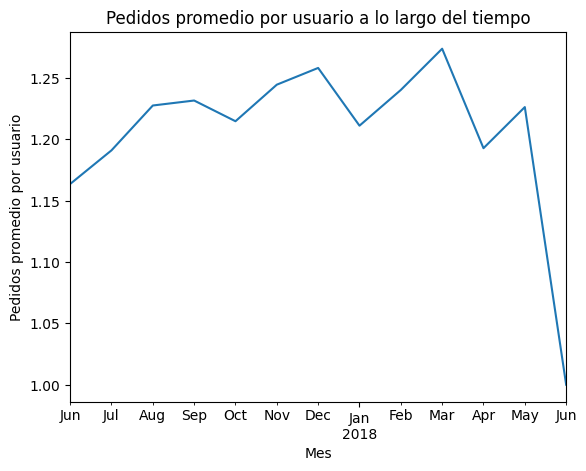

In [29]:
#Crearemos un gráfico para ver el número de pedidos por usuario en un período de tiempo
orders_per_user_month = (
    orders
    .groupby(['order_month', 'uid'])
    .size()
    .reset_index(name='orders_count')
)

#Ahora calculamos el promedio por mes
avg_orders_per_month = (
    orders_per_user_month
    .groupby('order_month')['orders_count']
    .mean()
)

#Creamos el gráfico
avg_orders_per_month.plot()
plt.title('Pedidos promedio por usuario a lo largo del tiempo')
plt.xlabel('Mes')
plt.ylabel('Pedidos promedio por usuario')
plt.show()

El gráfico muestra que, en promedio, los usuarios realizan entre 1.15 y 1.30 pedidos por mes.  
Esto indica que la mayoría de los usuarios realiza aproximadamente una compra mensual, con algunos meses en los que se observa un ligero aumento en la frecuencia de compra.

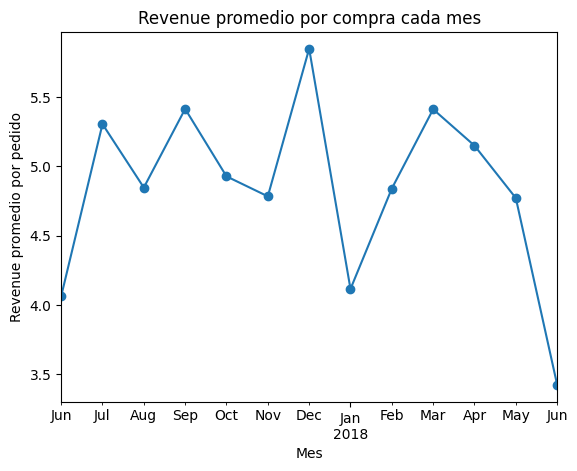

In [30]:
# Calcula el revenue promedio por pedido para cada mes
avg_revenue_per_month = (
    orders
    .groupby('order_month')['revenue']
    .mean()
)

# Grafica la evolución del revenue promedio por compra a lo largo del tiempo
avg_revenue_per_month.plot(marker='o')
plt.title('Revenue promedio por compra cada mes')
plt.xlabel('Mes')
plt.ylabel('Revenue promedio por pedido')
plt.show()

El revenue promedio por pedido se mantiene relativamente estable a lo largo del tiempo, con variaciones moderadas entre meses.

Se observan picos en algunos meses, lo que puede estar relacionado con estacionalidad, promociones o eventos específicos que incentivan compras de mayor valor.

La caída pronunciada en el último mes probablemente se debe a que el período no está completo, por lo que el revenue promedio registrado es menor.

### ¿Cuánto dinero traen?(LTV)

In [31]:
print('LTV promedio acumulado a 6 meses desde la primera compra:', m6_cum_ltv)

LTV promedio acumulado a 6 meses desde la primera compra: 2.585384615384615


## Conclusiones 

- La mayoría de los usuarios realiza su primera compra el mismo día de su primera visita o dentro de los primeros días posteriores.  
- La moda del tiempo de conversión es de 0 días, lo que indica que el comportamiento dominante es una conversión inmediata.
- Aunque el promedio del tiempo de conversión es de aproximadamente 16 días, este valor está influenciado por valores atípicos, como lo indica la alta desviación estándar.  
Por ello, la mediana y la moda representan mejor el comportamiento típico de los usuarios.
- El número promedio de pedidos por usuario se mantiene entre 1.15 y 1.30 pedidos por mes, lo que indica que la mayoría de los usuarios realiza aproximadamente una compra mensual.
- El comportamiento de compra es relativamente estable a lo largo del tiempo, sin cambios drásticos en la frecuencia de pedidos.
- El mapa de calor muestra que la mayor parte de los usuarios realiza un solo pedido por mes, mientras que un grupo menor presenta un comportamiento de compra recurrente con dos o más pedidos.
- El revenue promedio por pedido se mantiene relativamente estable a lo largo del período analizado, con variaciones moderadas entre meses.
- Los picos observados en algunos meses pueden estar relacionados con estacionalidad, promociones o eventos específicos que incentivan compras de mayor valor.
- La caída pronunciada del revenue promedio en el último mes probablemente se debe a que el período no está completo.
- El LTV promedio acumulado a seis meses desde la primera compra es de aproximadamente 2.59 unidades monetarias por cliente.
- Esto indica que el valor que genera un cliente se concentra principalmente en los primeros meses posteriores a su adquisición.
- Al comparar el LTV con el costo de adquisición de clientes (CAC), se observa que algunas cohortes y períodos presentan un ROMI superior a 1, lo que indica inversiones rentables.
- Sin embargo, también existen cohortes con ROMI inferior a 1, lo que sugiere que no todas las inversiones en marketing recuperan su costo.

En general, Showz logra convertir a los usuarios rápidamente y mantiene un comportamiento de compra estable, con aproximadamente una compra mensual por usuario.  
Dado que el revenue promedio por pedido es constante, el crecimiento de ingresos depende principalmente de aumentar la recurrencia y la retención de usuarios.  

El análisis de LTV, CAC y ROMI muestra que no todas las inversiones en marketing son igualmente rentables, por lo que se recomienda priorizar aquellas fuentes y períodos que presentan un ROMI superior a 1 y reducir la inversión en las menos eficientes.

# DataFrame de Marketing:

###  ¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo) 

In [32]:
#Agrupa datos de costos por fuente de adquisición y por mes
total_spend_source = (
    costs
    .groupby(['source_id','month'])['costs']
    .sum() #Calcula el gasto total por fuente y mes
    .reset_index()
)


print(total_spend_source.head(10))


   source_id    month    costs
0          1  2017-06  1125.61
1          1  2017-07  1072.88
2          1  2017-08   951.81
3          1  2017-09  1502.01
4          1  2017-10  2315.75
5          1  2017-11  2445.16
6          1  2017-12  2341.20
7          1  2018-01  2186.18
8          1  2018-02  2204.48
9          1  2018-03  1893.09


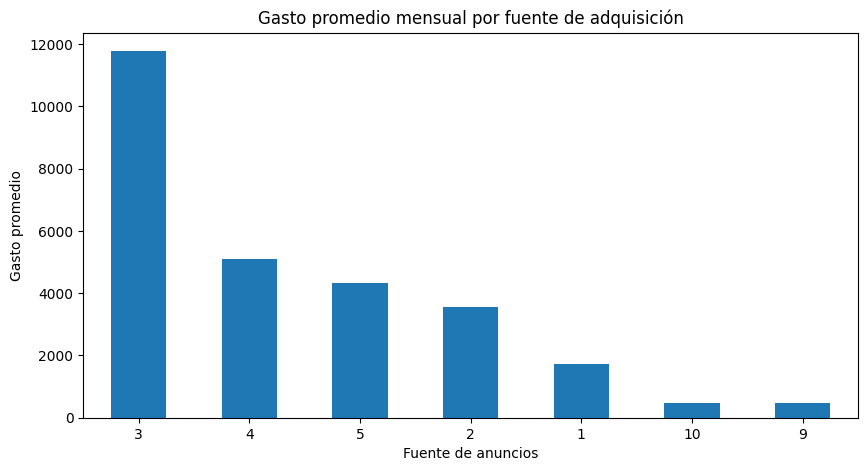

In [33]:
# Calcula el gasto promedio mensual por fuente de adquisición
avg_spend_by_source = (
    total_spend_source
    .groupby('source_id')['costs']  # Agrupa por fuente de adquisición
    .mean()                         # Calcula el gasto promedio
    .sort_values(ascending=False)   # Ordena de mayor a menor
)

# Crea el gráfico de barras
plt.figure(figsize=(10, 5))
avg_spend_by_source.plot(kind='bar')

# Personalización del gráfico
plt.title('Gasto promedio mensual por fuente de adquisición')
plt.xlabel('Fuente de anuncios')
plt.ylabel('Gasto promedio')
plt.xticks(rotation=0)

# Muestra el gráfico
plt.show()

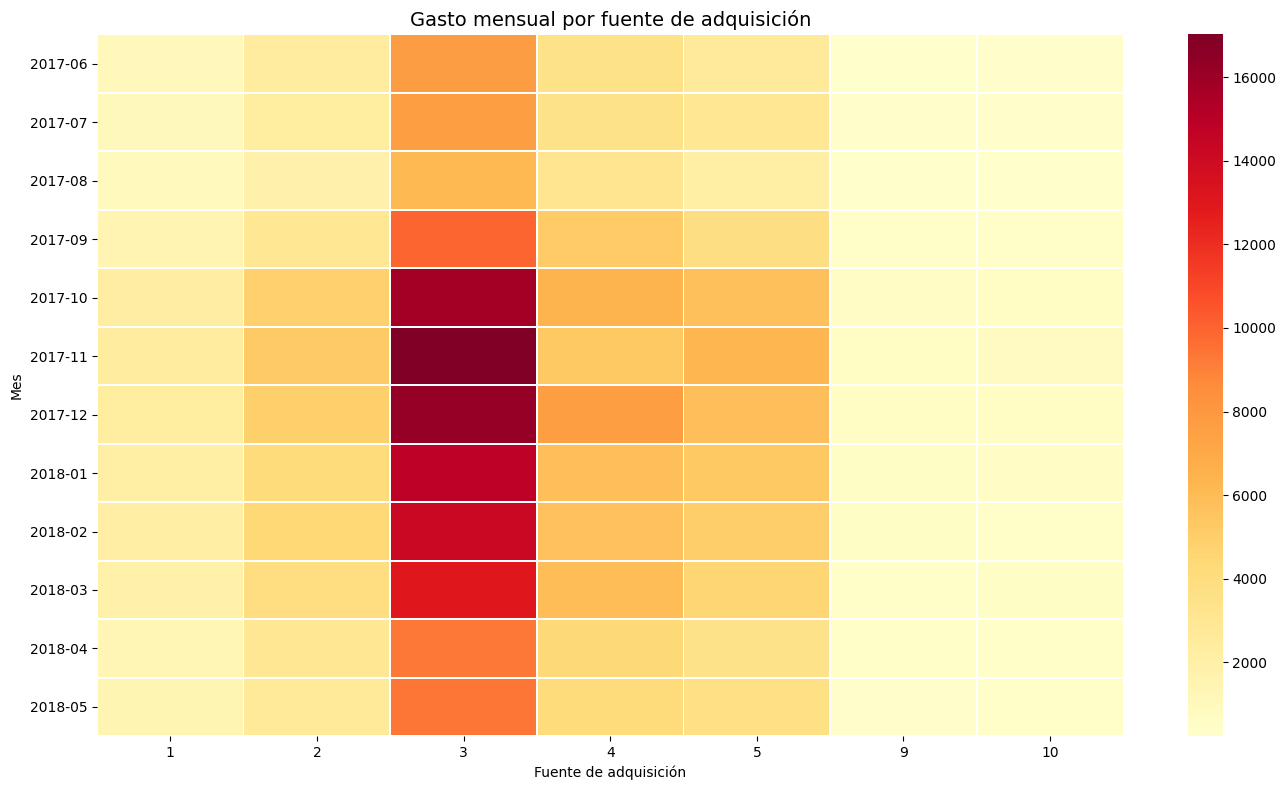

In [34]:
#Crea una tabla dinámica con el gasto total
heatmap_data = total_spend_source.pivot(
    index='source_id',
    columns='month',
    values='costs'
)

# Asegurar formato legible
heatmap_data.columns = heatmap_data.columns.astype(str)
heatmap_data = heatmap_data.T  # meses en filas


# Formato del eje Y: solo año-mes
heatmap_data.index = pd.to_datetime(heatmap_data.index)
heatmap_data.index = heatmap_data.index.strftime('%Y-%m')

# Crea el mapa de calor para visualizar el gasto mensual por fuente
plt.figure(figsize=(14, 8))
sns.heatmap(
    heatmap_data,
    cmap='YlOrRd', # Paleta de colores para resaltar diferencias de gasto
    linewidths=0.5 # Líneas para separar las celdas
)

# Personalización del gráfico
plt.title('Gasto mensual por fuente de adquisición', fontsize=14)
plt.xlabel('Fuente de adquisición')
plt.ylabel('Mes')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

En total, el gasto en marketing se distribuye de forma desigual entre las distintas fuentes de adquisición.

La mayor parte del presupuesto se asigna a un número reducido de fuentes, especialmente la fuente 3, que concentra el mayor gasto tanto en promedio mensual como a lo largo del tiempo.

Otras fuentes reciben una inversión moderada o mínima, lo que refleja una estrategia de marketing enfocada en canales específicos.

### ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

In [35]:
# Calculamos el gasto total de marketing en todo el período
total_costs = costs['costs'].sum()

# Calculamos el gasto total de marketing por fuente de adquisición
costs_by_source = costs.groupby('source_id')['costs'].sum()

# Mostramos el gasto total por cada fuente de anuncios
print(costs_by_source)

source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64


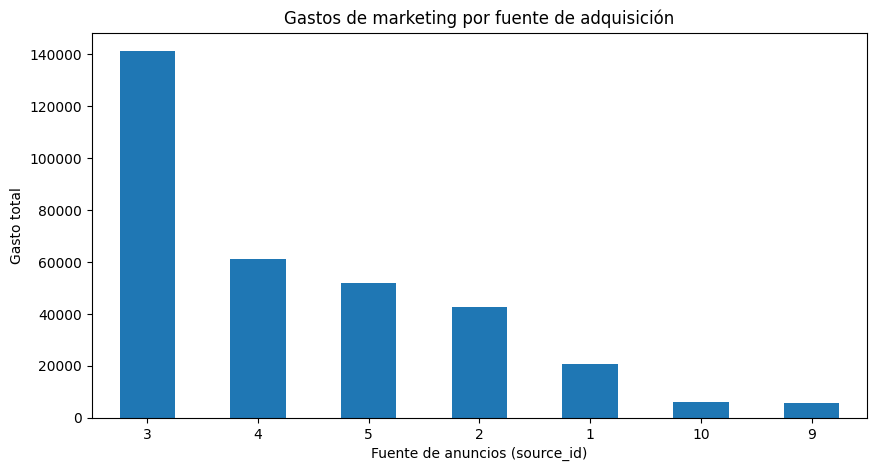

In [36]:
# Ordenamos las fuentes de adquisición según el gasto total de marketing
costs_by_source_sorted = costs_by_source.sort_values(ascending=False)

# Creamos un gráfico de barras para visualizar el gasto por fuente
plt.figure(figsize=(10, 5))
costs_by_source_sorted.plot(kind='bar')

# Agregamos títulos y etiquetas para facilitar la interpretación
plt.title('Gastos de marketing por fuente de adquisición')
plt.xlabel('Fuente de anuncios (source_id)')
plt.ylabel('Gasto total')
plt.xticks(rotation=0)

plt.show()

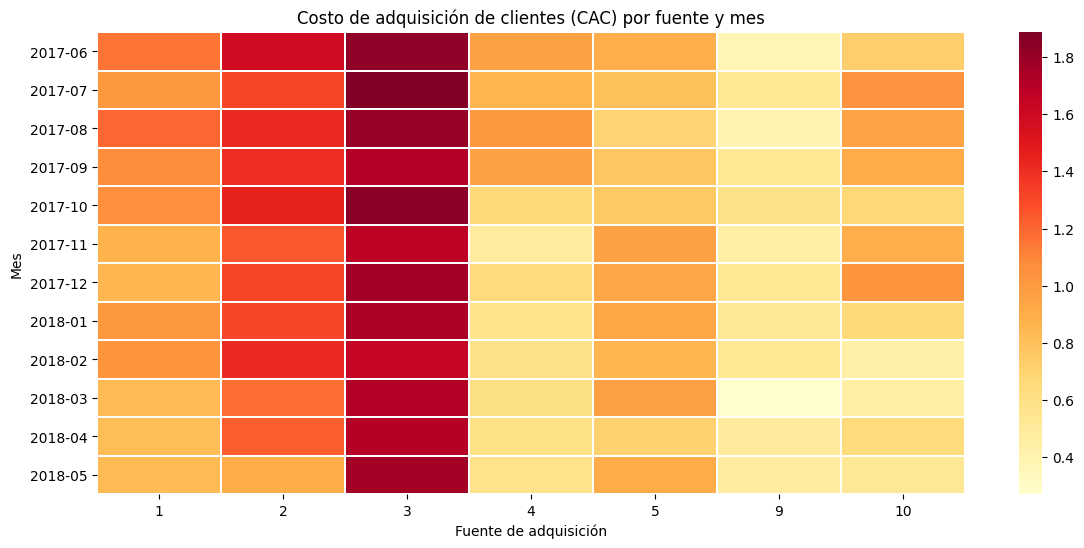

In [37]:
# Calculamos el gasto total de marketing por fuente y por mes
monthly_costs = (
    costs
    .groupby(['source_id', 'month'])['costs']
    .sum()
    .reset_index()
)

# Calculamos el número de usuarios únicos adquiridos por fuente y mes
monthly_users = (
    visits
    .groupby(['source_id', 'month'])['uid']
    .nunique()
    .reset_index()
)

# Renombramos la columna para mayor claridad
monthly_users.columns = ['source_id', 'month', 'users']

# Unimos los costos y el número de usuarios por fuente y mes
cac_monthly = monthly_costs.merge(
    monthly_users,
    on=['source_id', 'month'],
    how='inner'
)

# Calculamos el costo de adquisición de clientes (CAC)
cac_monthly['cac'] = cac_monthly['costs'] / cac_monthly['users']

# Eliminamos valores infinitos o faltantes para evitar distorsiones
cac_monthly = cac_monthly.replace([np.inf, -np.inf], np.nan).dropna()

# Creamos una tabla pivote para visualizar el CAC por fuente y mes
cac_pivot = cac_monthly.pivot(
    index='month',        # Mes en el eje Y
    columns='source_id',  # Fuente en el eje X
    values='cac'
).sort_index()

# Visualizamos el CAC por fuente y mes mediante un mapa de calor
plt.figure(figsize=(14, 6))
sns.heatmap(
    cac_pivot,
    cmap='YlOrRd',
    linewidths=0.5
)

plt.title('Costo de adquisición de clientes (CAC) por fuente y mes')
plt.xlabel('Fuente de adquisición')
plt.ylabel('Mes')
plt.show()


### Observaciones

- El gráfico muestra una distribución desigual del gasto de marketing entre las distintas fuentes de adquisición.
- La fuente 3 concentra la mayor parte del presupuesto de marketing, seguida por las fuentes 4 y 5, mientras que las fuentes 1, 9 y 10 reciben una inversión considerablemente menor.
- Esta concentración del gasto sugiere que la estrategia de marketing prioriza un número reducido de fuentes, lo que hace especialmente importante evaluar su rentabilidad.
- El mapa de calor muestra que el CAC varía tanto entre fuentes de adquisición como a lo largo del tiempo.
- La fuente 3 presenta consistentemente los valores más altos de CAC en casi todos los meses, lo que indica que adquirir clientes a través de esta fuente resulta más costoso.
- Las fuentes 9 y 10 muestran los valores más bajos de CAC de manera consistente, lo que sugiere una mayor eficiencia en la adquisición de clientes.
- Se observa cierta variabilidad mensual del CAC, lo que puede estar relacionado con cambios en campañas, estacionalidad o ajustes en el presupuesto.
- En particular, la fuente 3 combina un gasto elevado con un CAC alto, lo que plantea dudas sobre su eficiencia y justifica un análisis adicional de su rentabilidad (ROMI).
- Por el contrario, las fuentes con menor inversión y CAC bajo podrían representar oportunidades para optimizar la asignación del presupuesto de marketing.
- Al analizar conjuntamente el gasto total y el CAC, se observa que algunas de las fuentes con mayor inversión no necesariamente presentan el menor costo de adquisición. 

### ¿Cuán rentables eran las inversiones? (ROMI)

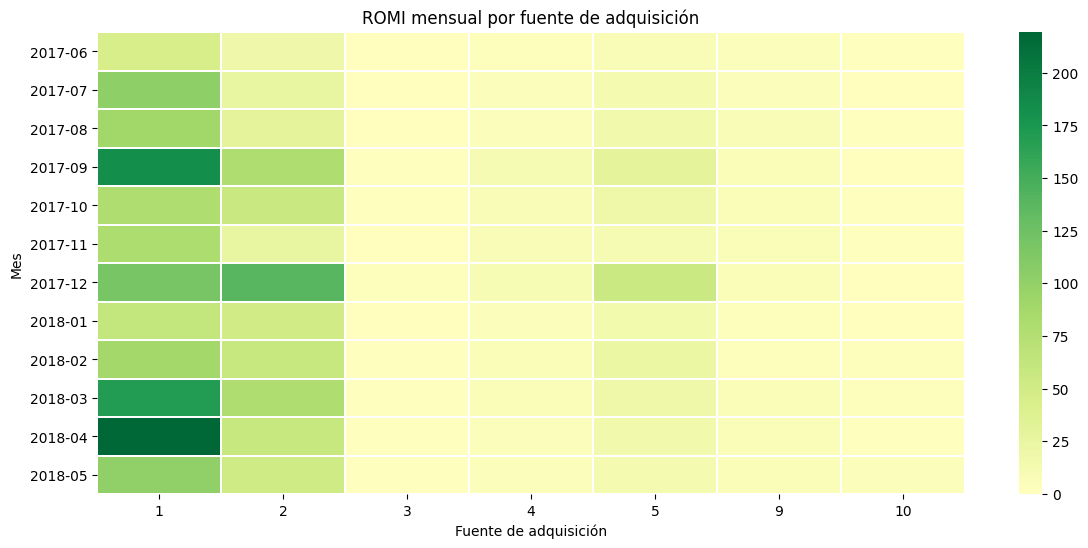

In [38]:
# Une ingresos y costos
romi_monthly = monthly_revenue.merge(
    monthly_costs,
    on=['source_id', 'month'],
    how='inner'
)

# Calcula el ROMI
romi_monthly['romi'] = (
    (romi_monthly['revenue'] - romi_monthly['costs']) /
    romi_monthly['costs']
)

# Convierte month a datetime
romi_monthly['month'] = romi_monthly['month'].dt.to_timestamp()

# Crea la tabla pivote
romi_pivot = romi_monthly.pivot(
    index='month',
    columns='source_id',
    values='romi'
).sort_index()

# Elimina fuentes sin datos (6, 7, 8)
romi_pivot = romi_pivot.dropna(axis=1, how='all')

# Formatea el eje Y (fecha)
romi_pivot.index = romi_pivot.index.strftime('%Y-%m')

# Mapa de calor del ROMI
plt.figure(figsize=(14, 6))
sns.heatmap(
    romi_pivot,
    cmap='RdYlGn',
    center=0,
    linewidths=0.5
)

plt.title('ROMI mensual por fuente de adquisición')
plt.xlabel('Fuente de adquisición')
plt.ylabel('Mes')
plt.show()

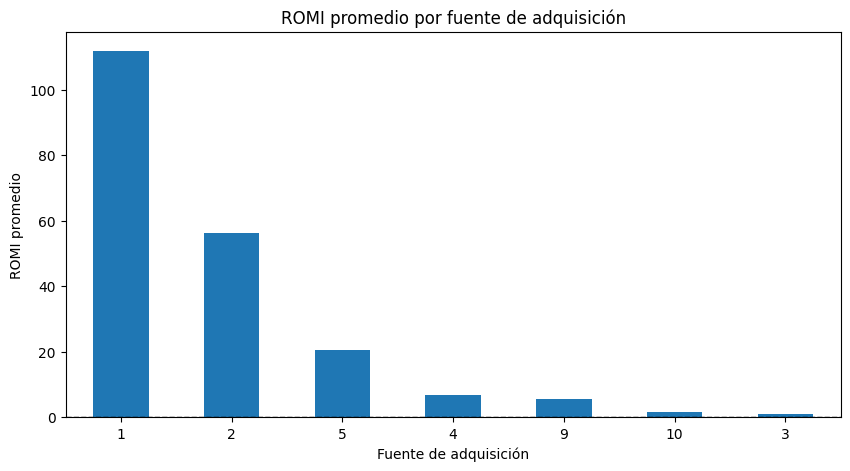

In [39]:
# Calcula el ROMI promedio por fuente de adquisición
romi_avg = (
    romi_monthly
    .groupby('source_id')['romi']
    .mean()
    .sort_values(ascending=False)
)

# Gráfico de barras: ROMI promedio por fuente
plt.figure(figsize=(10, 5))
romi_avg.plot(kind='bar')

plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('ROMI promedio por fuente de adquisición')
plt.xlabel('Fuente de adquisición')
plt.ylabel('ROMI promedio')
plt.xticks(rotation=0)
plt.show()


### Observaciones

- El mapa de calor muestra que el ROMI varía significativamente entre las diferentes fuentes de adquisición y a lo largo del tiempo.
- Las fuentes 1 y 2 presentan valores de ROMI consistentemente altos en la mayoría de los meses, lo que indica que estas fuentes generan ingresos muy superiores a su costo de adquisición.
- La fuente 1 destaca especialmente, con picos de ROMI muy elevados en varios meses, lo que sugiere una alta rentabilidad y un fuerte retorno de la inversión.
- Por el contrario, las fuentes 3 y 10 muestran valores de ROMI muy bajos o cercanos a cero en casi todos los meses, lo que indica que estas inversiones no logran recuperar su costo.
- Algunas fuentes, como la 5 y la 9, presentan un desempeño intermedio, con meses rentables y otros menos eficientes.
- El gráfico de barras resume el desempeño promedio de cada fuente de adquisición durante todo el período analizado.
- La fuente 1 es la más rentable en promedio, seguida por la fuente 2, lo que confirma que estas fuentes generan el mayor retorno sobre la inversión en marketing.
- Las fuentes 5 y 4 presentan un ROMI promedio positivo, pero considerablemente menor en comparación con las fuentes líderes.
- Las fuentes 3 y 10 muestran un ROMI promedio cercano a cero, lo que indica una rentabilidad muy baja o inexistente.
- Al analizar conjuntamente el ROMI mensual y el ROMI promedio, se observa que no todas las fuentes con alto gasto de marketing son necesariamente rentables.
- Las fuentes 1 y 2 destacan como las opciones más eficientes y consistentes, por lo que representan los mejores candidatos para aumentar la inversión.
- Las fuentes con ROMI bajo o cercano a cero deberían ser evaluadas críticamente y, potencialmente, recibir una reducción de presupuesto.
- En base al análisis de ROMI, se recomienda priorizar la inversión en las fuentes de adquisición 1 y 2, ya que muestran un retorno consistentemente alto a lo largo del tiempo.  
Por el contrario, las fuentes 3 y 10 no resultan rentables y deberían ser reevaluadas o descartadas para optimizar el uso del presupuesto de marketing.

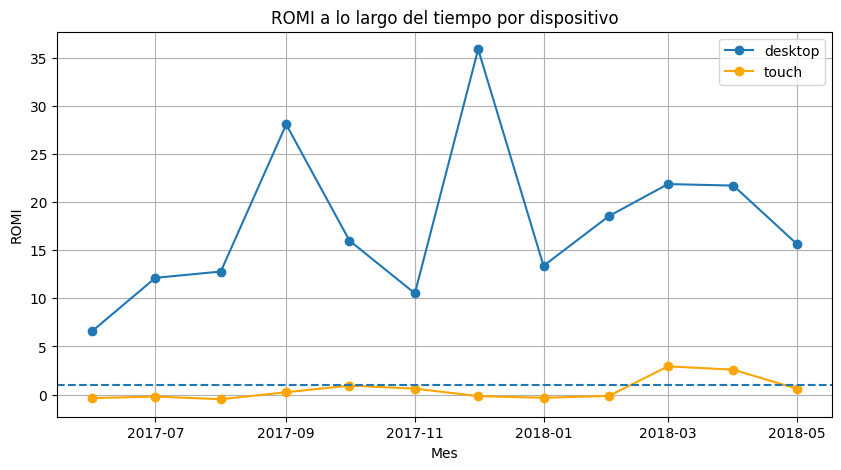

In [42]:
# Calculamos el revenue total por mes y por dispositivo
romi_time_device = (
    orders
    .merge(visits[['uid', 'device']], on='uid', how='left')
    .groupby(['month', 'device'])['revenue']
    .sum()
    .reset_index()
)

# Calculamos el gasto total de marketing por mes
month_costs = (
    costs
    .groupby('month')['costs']
    .sum()
    .reset_index()
)

# Unimos el revenue con los costos mensuales
romi_time_device = romi_time_device.merge(
    month_costs,
    on='month',
    how='left'
)

# Calculamos el ROMI mensual por dispositivo
romi_time_device['romi'] = (
    (romi_time_device['revenue'] - romi_time_device['costs'])
    / romi_time_device['costs']
)

# Convertimos la columna de mes a datetime para facilitar la visualización
romi_time_device['month'] = romi_time_device['month'].dt.to_timestamp()

# ===============================
# Gráfico
# ===============================

# Creamos el gráfico para comparar el ROMI por dispositivo a lo largo del tiempo
plt.figure(figsize=(10,5))

# Graficamos el ROMI para el dispositivo desktop
desktop_data = romi_time_device[romi_time_device['device'] == 'desktop']
plt.plot(
    desktop_data['month'],
    desktop_data['romi'],
    marker='o',
    label='desktop'
)

# Graficamos el ROMI para el dispositivo touch
touch_data = romi_time_device[romi_time_device['device'] == 'touch']
plt.plot(
    touch_data['month'],
    touch_data['romi'],
    marker='o',
    color='orange',
    label='touch'
)

# Agregamos una línea de referencia para ROMI = 1
plt.axhline(y=1, linestyle='--')

# Agregamos títulos, etiquetas y leyenda
plt.title('ROMI a lo largo del tiempo por dispositivo')
plt.xlabel('Mes')
plt.ylabel('ROMI')
plt.legend()
plt.grid(True)

plt.show()

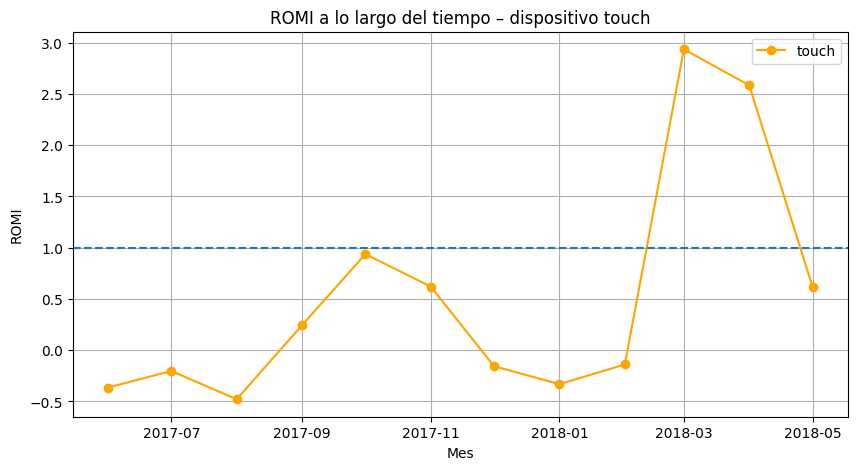

In [41]:
plt.figure(figsize=(10,5))

# Línea Touch (color naranja)
touch_data = romi_time_device[romi_time_device['device'] == 'touch']
plt.plot(
    touch_data['month'],
    touch_data['romi'],
    marker='o',
    color='orange',
    label='touch'
)

# Línea de referencia ROMI = 1
plt.axhline(y=1, linestyle='--')

# Estética
plt.title('ROMI a lo largo del tiempo – dispositivo touch')
plt.xlabel('Mes')
plt.ylabel('ROMI')
plt.legend()
plt.grid(True)

plt.show()


### Observaciones

- El gráfico muestra una diferencia clara en la rentabilidad del marketing según el dispositivo utilizado.
- El dispositivo desktop presenta valores de ROMI consistentemente altos y superiores a 1 durante todo el período analizado, lo que indica que las inversiones en marketing dirigidas a usuarios de desktop son altamente rentables.
- En contraste, el dispositivo touch muestra valores de ROMI significativamente más bajos, con varios meses por debajo de 1, lo que indica que en esos períodos la inversión en marketing no se recupera completamente.
- La brecha entre ambos dispositivos sugiere que el comportamiento de los usuarios y la eficiencia de adquisición difieren considerablemente según el dispositivo.
- El gráfico específico del dispositivo touch muestra una alta volatilidad en el ROMI a lo largo del tiempo.
- Durante la mayor parte del período analizado, el ROMI del dispositivo touch se mantiene por debajo de 1, lo que indica baja rentabilidad.
- Se observa un pico de rentabilidad en algunos meses puntuales, donde el ROMI supera claramente el umbral de 1, lo que sugiere que ciertas campañas o períodos específicos resultaron efectivas para este dispositivo.
- Sin embargo, estos picos no son consistentes en el tiempo, lo que indica que el desempeño del marketing en touch es menos predecible.
- En base al análisis, el marketing dirigido a usuarios de desktop resulta consistentemente más rentable que el dirigido a usuarios de touch.  
Por ello, se recomienda priorizar la inversión en campañas orientadas a desktop y evaluar cuidadosamente las campañas para dispositivos touch, enfocándose únicamente en los períodos y estrategias que hayan demostrado un ROMI positivo.

# Conclusiones para Marketing

### Recomendaciones de inversión en marketing

Con base en el análisis realizado, se recomienda priorizar la inversión en las fuentes de adquisición **1 y 2**, ya que muestran un desempeño superior en términos de rentabilidad. Estas fuentes presentan un **ROMI promedio consistentemente mayor a 1**, lo que indica que los ingresos generados superan el costo de adquisición de clientes.

La métrica principal utilizada para la toma de decisiones fue el **ROMI (Return on Marketing Investment)**, dado que permite evaluar directamente la eficiencia y rentabilidad de cada fuente de marketing. De forma complementaria, se analizaron el **CAC (Costo de Adquisición de Clientes)** y el **LTV (Lifetime Value)** para entender cuánto cuesta adquirir un cliente y cuánto valor genera a lo largo del tiempo.

El análisis mostró que un mayor gasto en marketing no garantiza una mayor rentabilidad. Algunas fuentes con altos niveles de inversión presentan un **CAC elevado** y un **ROMI bajo**, lo que indica una baja eficiencia. En particular, las fuentes **3 y 10** presentan valores de ROMI cercanos a cero o inferiores a 1 durante gran parte del período analizado, por lo que se recomienda **reducir o reevaluar la inversión** en estas fuentes.

Adicionalmente, el análisis por dispositivo evidenció que las campañas dirigidas a usuarios de **desktop** son considerablemente más rentables que aquellas orientadas a **touch**, cuyo ROMI muestra una mayor volatilidad y se mantiene por debajo de 1 en varios meses. Por ello, se recomienda enfocar la inversión principalmente en campañas orientadas a **desktop**, priorizando las fuentes con mejor desempeño.

En conclusión, una redistribución del presupuesto hacia las fuentes **1 y 2**, con énfasis en campañas para **desktop**, permitiría optimizar el uso del presupuesto de marketing y maximizar el retorno total de la inversión.
